# Table of Contents
### 1.0 [Introduction](#Introduction)
### 2.0 [Data Import and Overview](#Data-Import-and-Overview)
### 3.0 [Data Cleaning](#Data-Cleaning)
### 4.0 [Exploratory Data Analysis](#Exploratory-Data-Analysis)
>##### 4.1 [Reformatting](#4.1-Reformatting')
>##### 4.2 [String Capitalization](#4.2-String-Capitalization)
>##### 4.3 [Manufacturer Uppercase](#4.3-Manufacturer-Uppercase)
>##### 4.4 [Model Age](#4.4-Model-Year)
>##### 4.5 [NaNs, Unique Values, anad Duplicates](#nans-unique-duplicates)
### 5.0 [Statistical Data Analysis](#sda)
>##### 5.1 [Price](#price)
>##### 5.2 [Year](#year)
### 6.0 [Misc.](#6.Misc)

# Introduction
<a id="Introduction"></a>

This project aims to analyze the vehicle ads in the United States. The project will involve cleaning and preprocessing the data, performing exploratory data analysis, creating visuals, and some statistics. #What's my goal though?

## Data Import and Overview
<a id="Data-Import-and-Overview"></a>

First we'll import some libraries. For this project I'll be using pandas, plotly.express, matplotlib, and numpy. Then we'll import the dataset itself and afterward print the dataframe to have a quick overview.

In [26]:
# Importing Libraries and having an initial overview of the dataset

import pandas as pd
import plotly.express as px
import matplotlib as plt

df = pd.read_csv("vehicles_us.csv")

df

price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500         NaN      ford f-150       good        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas       NaN   

      transmission    type paint_color  is_4wd date_posted  days_listed  
0        automatic     SUV         NaN     1.0  2018-06-23           19  
1        automatic  pickup       white     1.0  2018-10-19           50  
2        automatic   sedan         red     NaN  2019-02-07           79  
3        automatic  pickup         NaN     NaN  2019-03-22            9  
4        automatic   sedan       black     NaN  2019-04-02           28  
...            ...     ...         ...     ...         ...          ...  
51520    automatic   sedan       black     NaN  2018-10-03           37  
51521    automatic   sedan       white     NaN  2018-11-14           22  
51522    automatic   sedan        blue     NaN  2018-11-15           32  
51523    automatic   sedan       black     NaN  2018-07-02           71  
51524    automatic   sedan         NaN     NaN  2018-06-05           10  

[51525 rows x 13 columns]

## Exploratory Data Analysis
<a id="Exploratory-Data-Analysis"></a>

For this portion, we'll begin by splitting the "model" column into a "manufacturer" and "model" column by taking the first element in the string of a cell (e.g., if the vehicle is a "nissan altima", we'll split it so that we extract "nissan" and put it into the new "manufacturer column"). Since splitting the column doesn't delete the first element of the string (e.g. with our "nissan altima" example, it would still say "nissan altima" instead of just "altima" in the "model column"), we'll redefine the model column by spitting all elements after the fist element and joining it with the space (' ') preceding it. 

We'll capitalize the first letter of each string in the two aforementioned columns and then move the 'manufacturer' column in front of the 'model' column because:

A. It visually looks a little nicer and

B. It's more intuitive to have 'manufacturer' and 'model' juxtaposed as opposed to the former's current position.

In [27]:
# Creating a 'manufacturer' column by splitting initial element from 'Model' column
df['manufacturer'] = df['model'].apply(lambda x: x.split()[0])
# Removing initial element from strings in 'Model'
df['model'] = df['model'].apply(lambda x: ' '.join(x.split()[1:]))


#### 4.1 Reformatting 
<a index= '4.1-Reformatting'></a>
Renaming all columns and moving 'Manufacturer' to be between 'Year' and 'Model'.

In [28]:

df = df.rename(columns= {'price': 'Price (USD)', 
                         'model_year': 'Model Year', 
                         'model': 'Model', 
                         'condition': 'Condition', 
                         'cylinders': 'Cylinders', 
                         'fuel': 'Fuel', 
                         'odometer': 'Odometer', 
                         'transmission': 'Transmission', 
                         'type': 'Type', 
                         'paint_color': 'Paint Color', 
                         'is_4wd': '4WD', 
                         'date_posted': 'Date Posted', 
                         'days_listed': 'Days Listed', 
                         'manufacturer': 'Manufacturer'
                         })

# Switching column order
df = df[['Price (USD)', 
         'Model Year',
         'Manufacturer',  
         'Model', 
         'Condition', 
         'Cylinders', 
         'Fuel', 
         'Odometer', 
         'Transmission', 
         'Type', 
         'Paint Color', 
         '4WD', 
         'Date Posted', 
         'Days Listed'
         ]]


#### 4.2 String Capitalization
<p style="margin-top: -25px;">
<a id= (4.2-String-Capitalization)></a>
Capitalizing 'Manufacturer' and 'Model' columns.

In [29]:
# Capitalizing first letter of all strings
for col in ['Manufacturer', 'Model']: 
    df['Manufacturer'] = df['Manufacturer'].str.capitalize()
    df['Model'] = df['Model'].str.capitalize()

df

Price (USD)  Model Year Manufacturer    Model  Condition  Cylinders  \
0             9400      2011.0          Bmw       X5       good        6.0   
1            25500         NaN         Ford    F-150       good        6.0   
2             5500      2013.0      Hyundai   Sonata   like new        4.0   
3             1500      2003.0         Ford    F-150       fair        8.0   
4            14900      2017.0     Chrysler      200  excellent        4.0   
...            ...         ...          ...      ...        ...        ...   
51520         9249      2013.0       Nissan   Maxima   like new        6.0   
51521         2700      2002.0        Honda    Civic    salvage        4.0   
51522         3950      2009.0      Hyundai   Sonata  excellent        4.0   
51523         7455      2013.0       Toyota  Corolla       good        4.0   
51524         6300      2014.0       Nissan   Altima       good        4.0   

      Fuel  Odometer Transmission    Type Paint Color  4WD Date Posted  \
0      gas  145000.0    automatic     SUV         NaN  1.0  2018-06-23   
1      gas   88705.0    automatic  pickup       white  1.0  2018-10-19   
2      gas  110000.0    automatic   sedan         red  NaN  2019-02-07   
3      gas       NaN    automatic  pickup         NaN  NaN  2019-03-22   
4      gas   80903.0    automatic   sedan       black  NaN  2019-04-02   
...    ...       ...          ...     ...         ...  ...         ...   
51520  gas   88136.0    automatic   sedan       black  NaN  2018-10-03   
51521  gas  181500.0    automatic   sedan       white  NaN  2018-11-14   
51522  gas  128000.0    automatic   sedan        blue  NaN  2018-11-15   
51523  gas  139573.0    automatic   sedan       black  NaN  2018-07-02   
51524  gas       NaN    automatic   sedan         NaN  NaN  2018-06-05   

       Days Listed  
0               19  
1               50  
2               79  
3                9  
4               28  
...            ...  
51520           37  
51521           22  
51522           32  
51523           71  
51524           10  

[51525 rows x 14 columns]

#### 4.3 Manufacturer Uppercase
<p style="margin-top: -25px;">
<a id=[4.3-Manufacturer-Uppercase]></a>
Changing manufacturer names that shoud be all uppercare.

At a glance I can see that BMW is not properly capitalized in the 'Manufacturer' column (currently it says 'Bwm'), so let's see if there are other brands that are not properly capitalized.

In [30]:
df['Manufacturer'].unique()

array(['Bmw', 'Ford', 'Hyundai', 'Chrysler', 'Toyota', 'Honda', 'Kia',
       'Chevrolet', 'Ram', 'Gmc', 'Jeep', 'Nissan', 'Subaru', 'Dodge',
       'Mercedes-benz', 'Acura', 'Cadillac', 'Volkswagen', 'Buick'],
      dtype=object)

There is indeed another manufacturer not capitalized: GMC. To fix this and Bmw as well, let's define a function called 'convert_to_uppercase' and give it the parameters 'row' and 'string'. We'll pass an 'if' statement that can basically be interpreted as "If the given row is the same as whatever object is set to the string variable (in this case, the incorrectly spelled "BMW" and "GMC"), change the entire string to uppercase".

In [31]:
# Creating the uppercase function
def convert_to_uppercase(row, string): 
    if row == string: 
        return row.upper() 
    return row

# Apply to 'Bmw'
string = 'Bmw' 
df['Manufacturer'] = df['Manufacturer'].apply(lambda x: convert_to_uppercase(x, string))

# Apply to 'Gmc'
string = 'Gmc'
df['Manufacturer'] = df['Manufacturer'].apply(lambda x: convert_to_uppercase(x, string))

df['Manufacturer']

0             BMW
1            Ford
2         Hyundai
3            Ford
4        Chrysler
           ...   
51520      Nissan
51521       Honda
51522     Hyundai
51523      Toyota
51524      Nissan
Name: Manufacturer, Length: 51525, dtype: object

#### 4.4 Model Age
<p style="margin-top: -25px;">
<a id= [4.4-Model-Age]></a>
Creating the 'Age' and 'Age Category' columns.

Next we'll create an 'Age' column to use in our analysis. Since the current year as of writing this is 2025, we'll subtract the 'Model Year' column from said year to obtain df['Age'].

Then we'll group 'Age' into categories so that the user can filter them. To do this, we'll first define a function called 'age_category' and give it one parameter: 'x'. Then we'll create a conditional that defines the groupings we desire: cars less than 5 yrs. old, 5-10 years old, 10-20 years old, and finally 20 years or older. Finally, we'll create an 'Age Category' column that will take the 'Age' column and have the ".apply" method called on it, then pass it the arugment 'age_category, which is the function we recently defined.

In [32]:
# Current year is 2025, so we subtract said year from the model year to obtain the age of the vehicle
df['Age'] = 2025 - df['Model Year']

df.head()

Price (USD)  Model Year Manufacturer   Model  Condition  Cylinders Fuel  \
0         9400      2011.0          BMW      X5       good        6.0  gas   
1        25500         NaN         Ford   F-150       good        6.0  gas   
2         5500      2013.0      Hyundai  Sonata   like new        4.0  gas   
3         1500      2003.0         Ford   F-150       fair        8.0  gas   
4        14900      2017.0     Chrysler     200  excellent        4.0  gas   

   Odometer Transmission    Type Paint Color  4WD Date Posted  Days Listed  \
0  145000.0    automatic     SUV         NaN  1.0  2018-06-23           19   
1   88705.0    automatic  pickup       white  1.0  2018-10-19           50   
2  110000.0    automatic   sedan         red  NaN  2019-02-07           79   
3       NaN    automatic  pickup         NaN  NaN  2019-03-22            9   
4   80903.0    automatic   sedan       black  NaN  2019-04-02           28   

    Age  
0  14.0  
1   NaN  
2  12.0  
3  22.0  
4   8.0

In [33]:
# Creating a function to sort vehicles into discrete groupings
def age_category(x): 
    if x < 5: 
        return '<5'
    elif x >= 5 and x < 10: 
        return '5-10'
    elif x >= 10 and x < 20: 
        return '10-20'
    else: 
        return '>20'
    

# Creating the 'Age Category' column by taking the 'Age' column and using the apply method with the previously created function 'age_category' as its parameter.
df['Age Category'] = df['Age'].apply(age_category)

df.head()

Price (USD)  Model Year Manufacturer   Model  Condition  Cylinders Fuel  \
0         9400      2011.0          BMW      X5       good        6.0  gas   
1        25500         NaN         Ford   F-150       good        6.0  gas   
2         5500      2013.0      Hyundai  Sonata   like new        4.0  gas   
3         1500      2003.0         Ford   F-150       fair        8.0  gas   
4        14900      2017.0     Chrysler     200  excellent        4.0  gas   

   Odometer Transmission    Type Paint Color  4WD Date Posted  Days Listed  \
0  145000.0    automatic     SUV         NaN  1.0  2018-06-23           19   
1   88705.0    automatic  pickup       white  1.0  2018-10-19           50   
2  110000.0    automatic   sedan         red  NaN  2019-02-07           79   
3       NaN    automatic  pickup         NaN  NaN  2019-03-22            9   
4   80903.0    automatic   sedan       black  NaN  2019-04-02           28   

    Age Age Category  
0  14.0        10-20  
1   NaN          >20  
2  12.0        10-20  
3  22.0          >20  
4   8.0         5-10

#### 4.5 NaNs, Unique Values, and Duplicates
<p style="margin-top: -25px;">
<a id=[nans-unique-duplicates]></a>

In [34]:
# Checking for missing values and column dtypes
print(f'NaN values:')
print(df.isna().sum())
print('\n', f'dtypes:')
print(df.dtypes)

NaN values:
Price (USD)         0
Model Year       3619
Manufacturer        0
Model               0
Condition           0
Cylinders        5260
Fuel                0
Odometer         7892
Transmission        0
Type                0
Paint Color      9267
4WD             25953
Date Posted         0
Days Listed         0
Age              3619
Age Category        0
dtype: int64

 dtypes:
Price (USD)       int64
Model Year      float64
Manufacturer     object
Model            object
Condition        object
Cylinders       float64
Fuel             object
Odometer        float64
Transmission     object
Type             object
Paint Color      object
4WD             float64
Date Posted      object
Days Listed       int64
Age             float64
Age Category     object
dtype: object


In [35]:
# Counting unique values in each column
for col in df.columns:
    unique_values = df.nunique()
    print(f"{col}: {unique_values[col]}")

Price (USD): 3443
Model Year: 68
Manufacturer: 19
Model: 100
Condition: 6
Cylinders: 7
Fuel: 5
Odometer: 17762
Transmission: 3
Type: 13
Paint Color: 12
4WD: 1
Date Posted: 354
Days Listed: 227
Age: 68
Age Category: 3


In [36]:
# Checking for duplicates
has_duplicates = df.duplicated().any()
print(has_duplicates)

False


## Statistical Data Analysis
<p style= "margin-top: -25px;">
<a index= sda></a>

#### 5.1 Price 
<p style "margin-top: -25px;">
<a index= price>,=</a>

In [37]:
# I'm curious about the distribution of car prices.
df['Price (USD)'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: Price (USD), dtype: float64

In [38]:
price_distribution = px.histogram(df, 
                                  x= 'Price (USD)', 
                                  title= 'Distribution of Car Prices', 
                                  color_discrete_sequence= px.colors.qualitative.Plotly)

price_distribution.update_layout(title= {'x': 0.5})

price_distribution

Well there are certainly some MAJOR outliers ...

<Axes: title={'center': 'Average price by manufacturer'}, xlabel='Manufacturer', ylabel='Price (USD)'>

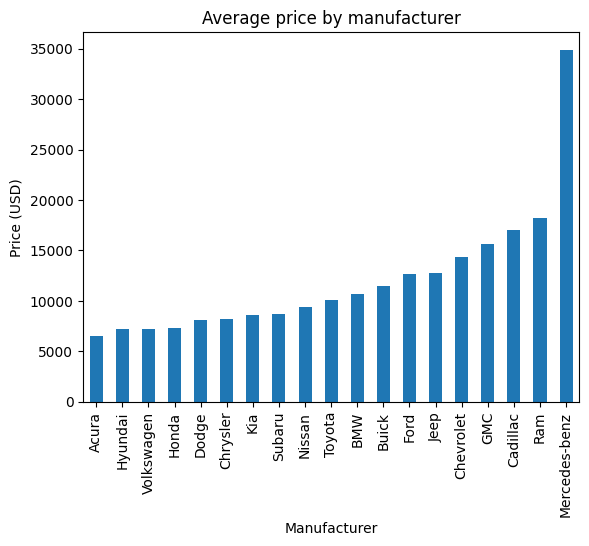

In [39]:
df.groupby('Manufacturer')['Price (USD)'].mean().sort_values(ascending= True).plot(kind= 'bar', 
                                                                             xlabel= 'Manufacturer', 
                                                                             ylabel= 'Price (USD)', 
                                                                             title= 'Average price by manufacturer', 
                                                                             )

#### 5.2 Year 
<p style= "margin-top: -25px;">
<a index= year></a>

In [40]:
condition_count = df.groupby('Condition')['Condition'].count()
condition_count

Condition
excellent    24773
fair          1607
good         20145
like new      4742
new            143
salvage        115
Name: Condition, dtype: int64

<Axes: title={'center': 'Amount of Vehicles in a Certain Condition'}, xlabel='Condition', ylabel='Vehicle Count'>

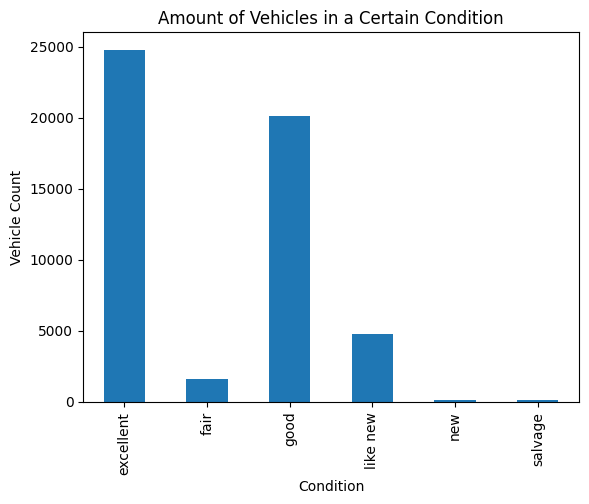

In [41]:
# Creating bar graph sorting 'condition' and comparing vehicle counts between the sorted values
condition_count.plot(kind='bar', 
                     title='Amount of Vehicles in a Certain Condition', 
                     xlabel= 'Condition', 
                     ylabel= 'Vehicle Count')

In [42]:
df

Price (USD)  Model Year Manufacturer    Model  Condition  Cylinders  \
0             9400      2011.0          BMW       X5       good        6.0   
1            25500         NaN         Ford    F-150       good        6.0   
2             5500      2013.0      Hyundai   Sonata   like new        4.0   
3             1500      2003.0         Ford    F-150       fair        8.0   
4            14900      2017.0     Chrysler      200  excellent        4.0   
...            ...         ...          ...      ...        ...        ...   
51520         9249      2013.0       Nissan   Maxima   like new        6.0   
51521         2700      2002.0        Honda    Civic    salvage        4.0   
51522         3950      2009.0      Hyundai   Sonata  excellent        4.0   
51523         7455      2013.0       Toyota  Corolla       good        4.0   
51524         6300      2014.0       Nissan   Altima       good        4.0   

      Fuel  Odometer Transmission    Type Paint Color  4WD Date Posted  \
0      gas  145000.0    automatic     SUV         NaN  1.0  2018-06-23   
1      gas   88705.0    automatic  pickup       white  1.0  2018-10-19   
2      gas  110000.0    automatic   sedan         red  NaN  2019-02-07   
3      gas       NaN    automatic  pickup         NaN  NaN  2019-03-22   
4      gas   80903.0    automatic   sedan       black  NaN  2019-04-02   
...    ...       ...          ...     ...         ...  ...         ...   
51520  gas   88136.0    automatic   sedan       black  NaN  2018-10-03   
51521  gas  181500.0    automatic   sedan       white  NaN  2018-11-14   
51522  gas  128000.0    automatic   sedan        blue  NaN  2018-11-15   
51523  gas  139573.0    automatic   sedan       black  NaN  2018-07-02   
51524  gas       NaN    automatic   sedan         NaN  NaN  2018-06-05   

       Days Listed   Age Age Category  
0               19  14.0        10-20  
1               50   NaN          >20  
2               79  12.0        10-20  
3                9  22.0          >20  
4               28   8.0         5-10  
...            ...   ...          ...  
51520           37  12.0        10-20  
51521           22  23.0          >20  
51522           32  16.0        10-20  
51523           71  12.0        10-20  
51524           10  11.0        10-20  

[51525 rows x 16 columns]

## 6. Misc. 
<a index= "6.Misc"></a>
 

In [43]:
fig = px.parallel_coordinates(df, color_continuous_scale= px.colors.diverging.RdYlGn, color_continuous_midpoint= 2)

fig

In [44]:
df["Price (USD)"].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: Price (USD), dtype: float64

In [45]:
v = 10040.80**2
v

100817664.63999999

In [46]:
# Correlation between age and odometer
fig5 = px.line(df, 
               x= "Price (USD)", 
               y= "Odometer"
               )

fig5